# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline

data = pd.read_csv('weatherAUS.csv')

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Di langkah ini, saya mengimpor pustaka yang diperlukan untuk analisis data dan pemodelan. Pustaka seperti NumPy dan Pandas digunakan untuk manipulasi data, Matplotlib dan Seaborn untuk visualisasi, dan beberapa komponen dari Scikit-Learn untuk pra-pemrosesan data, pembagian dataset, dan pembuatan model. Saya juga memuat data menggunakan Pandas untuk melihat lima baris pertama dan memahami struktur awal dataset.

# **Data Cleaning**

In [ ]:
data.columns = [col.replace(' ', '') for col in data.columns]

missing_values = data.isnull().sum()

threshold = len(data) * 0.3
columns_to_drop = missing_values[missing_values > threshold].index.tolist()
data_cleaned = data.drop(columns=columns_to_drop).dropna(subset=['RainTomorrow'])

num_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data_cleaned.select_dtypes(include=['object']).columns.difference(['Date'])

imputer_num = SimpleImputer(strategy='median')
data_cleaned[num_cols] = imputer_num.fit_transform(data_cleaned[num_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
data_cleaned[cat_cols] = imputer_cat.fit_transform(data_cleaned[cat_cols])

data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Day'] = data_cleaned['Date'].dt.day

data_cleaned.drop(columns='Date', inplace=True)

encoder = LabelEncoder()
for col in cat_cols:
    data_cleaned[col] = encoder.fit_transform(data_cleaned[col])

data_cleaned['RainTomorrow'] = encoder.fit_transform(data_cleaned['RainTomorrow'])

data_cleaned.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5


Pada tahap ini, saya membersihkan dataset dengan mengganti nama kolom untuk konsistensi, menangani nilai yang hilang dengan menghapus kolom yang memiliki terlalu banyak nilai hilang, dan mengisi nilai yang hilang yang tersisa dengan median untuk kolom numerik dan modus untuk kolom kategorikal. saya juga mengubah kolom 'Tanggal' menjadi tipe data datetime dan mengkodekan variabel kategorikal menjadi numerik.

# **Eksplorasi Data**

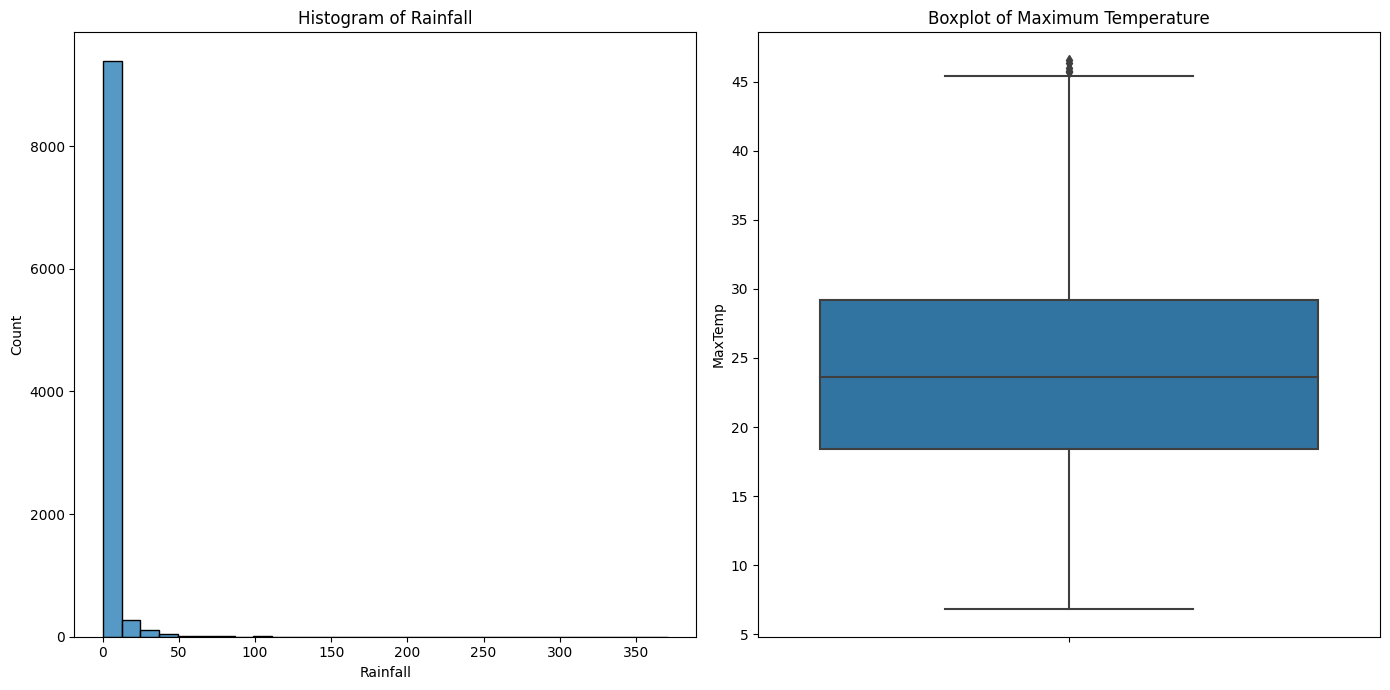

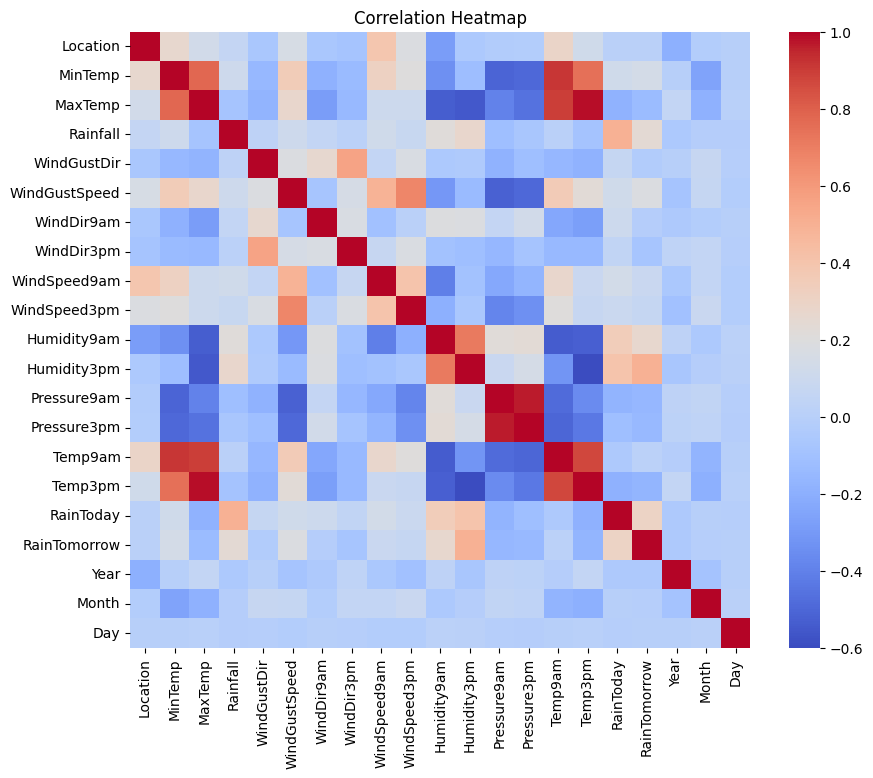

(          Location      MinTemp      MaxTemp     Rainfall  WindGustDir  \
 count  9867.000000  9867.000000  9867.000000  9867.000000  9867.000000   
 mean      1.188203    11.548900    24.105108     2.131276     8.064356   
 std       0.976591     6.298439     7.171730     8.596390     4.887402   
 min       0.000000    -3.000000     6.800000     0.000000     0.000000   
 25%       0.000000     6.500000    18.400000     0.000000     4.000000   
 50%       1.000000    11.400000    23.600000     0.000000     9.000000   
 75%       2.000000    16.600000    29.200000     0.200000    12.000000   
 max       3.000000    29.700000    46.600000   371.000000    15.000000   
 
        WindGustSpeed   WindDir9am   WindDir3pm  WindSpeed9am  WindSpeed3pm  \
 count    9867.000000  9867.000000  9867.000000   9867.000000   9867.000000   
 mean       34.838046     8.051181     7.842100     10.769028     15.115739   
 std        12.441956     4.536618     4.710965      7.333728      7.419900   
 min   

In [ ]:
summary_statistics = data_cleaned.describe()
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Rainfall'], bins=30, kde=False)
plt.title('Histogram of Rainfall')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_cleaned['MaxTemp'])
plt.title('Boxplot of Maximum Temperature')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=False, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

(summary_statistics, "Summary statistics, histogram of 'Rainfall', boxplot of 'MaxTemp', and correlation heatmap generated.")

Di sini saya melakukan analisis eksploratif data untuk mendapatkan wawasan awal dari dataset. Saya menghitung statistik deskriptif, membuat histogram untuk melihat distribusi curah hujan, boxplot untuk suhu maksimum, dan heatmap untuk melihat korelasi antar fitur.

# **Data Preprocessing**

In [ ]:
X = data_cleaned.drop('RainTomorrow', axis=1)
y = data_cleaned['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

logreg.fit(X_train_scaled, y_train)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Langkah ini melibatkan pemisahan fitur dan variabel target, pembagian data menjadi set pelatihan dan pengujian, dan penskalaan fitur. Selanjutnya, saya mendefinisikan model Regresi Logistik dan K-Nearest Neighbors (KNN), menjelaskan alasan pemilihan kedua model tersebut, dan melatihnya dengan data yang telah diproses.

# **Evaluasi Model**

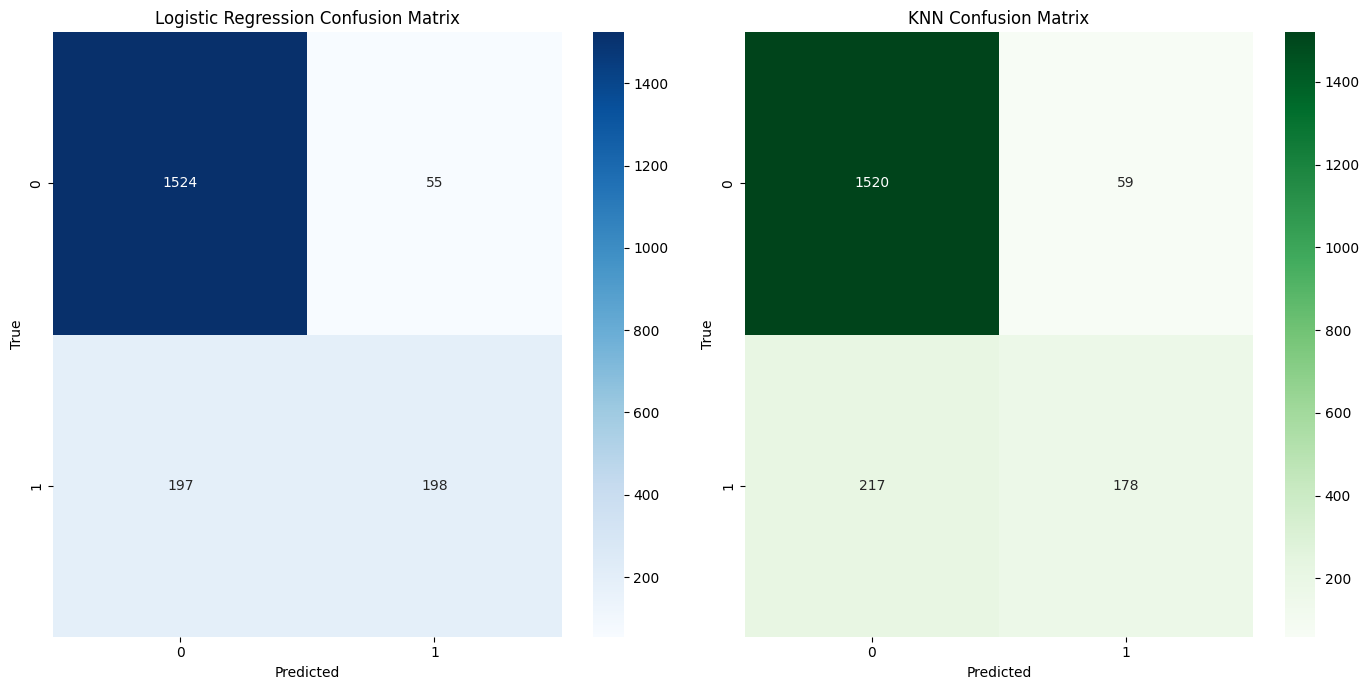

(0.8723404255319149,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.97      0.92      1579\n           1       0.78      0.50      0.61       395\n\n    accuracy                           0.87      1974\n   macro avg       0.83      0.73      0.77      1974\nweighted avg       0.86      0.87      0.86      1974\n',
 0.8601823708206687,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92      1579\n           1       0.75      0.45      0.56       395\n\n    accuracy                           0.86      1974\n   macro avg       0.81      0.71      0.74      1974\nweighted avg       0.85      0.86      0.85      1974\n',
 'Confusion matrices for Logistic Regression and KNN visualized.')

In [ ]:
logreg_pred = logreg.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_class_report = classification_report(y_test, logreg_pred)

knn_pred = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_class_report = classification_report(y_test, knn_pred)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

(logreg_accuracy, logreg_class_report, knn_accuracy, knn_class_report, "Confusion matrices for Logistic Regression and KNN visualized.")

Setelah pelatihan, saya mengevaluasi model dengan memprediksi set pengujian dan menghitung akurasi. Saya juga menampilkan matriks kebingungan untuk melihat kinerja model dalam memprediksi kelas yang benar, serta laporan klasifikasi untuk mendapatkan detail metrik lain seperti presisi dan recall.

# **Kesimpulan**

In [ ]:
X_inference_subset = X_test_scaled[:10]
y_inference_true = y_test[:10]

logreg_inference_pred = logreg.predict(X_inference_subset)
knn_inference_pred = knn.predict(X_inference_subset)

inference_comparison = pd.DataFrame({
    'True Rain Tomorrow': y_inference_true,
    'LogReg Prediction': logreg_inference_pred,
    'KNN Prediction': knn_inference_pred
})

inference_comparison.reset_index(drop=True, inplace=True)
inference_comparison

,True Rain Tomorrow,LogReg Prediction,KNN Prediction
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,1
4,0,0,0
5,1,1,1
6,1,1,1
7,0,0,0
8,0,0,0
9,0,0,0


Di langkah ini, saya melakukan inferensi model menggunakan subset kecil dari data pengujian untuk melihat bagaimana model memprediksi data baru. Saya membandingkan prediksi dengan nilai sebenarnya untuk melihat keakuratan prediksi model.

# **Analisa Menggunakan LR dan KNN**

Proyek ini membangun model prediktif untuk meramalkan hujan di Australia. Regresi Logistik dipilih karena kesederhanaan dan kemudahan interpretasi dalam tugas klasifikasi biner, dengan akurasi sekitar 87.23%. KNN dipilih karena kemampuannya menangani pola yang kompleks tanpa asumsi distribusi data tertentu, mencapai akurasi sekitar 86.01%. Kedua model lebih akurat dalam memprediksi hari tanpa hujan dibandingkan dengan hari hujan, yang mungkin disebabkan oleh ketidakseimbangan kelas atau sifat data cuaca. Inferensi model menunjukkan bahwa kedua model dapat meramalkan cuaca dengan akurasi yang wajar, meskipun terdapat perbedaan prediksi dalam beberapa kasus. Secara keseluruhan, tujuan proyek untuk memprediksi hujan tercapai dengan akurasi yang baik. Untuk peningkatan lebih lanjut, model yang lebih kompleks dan rekayasa fitur bisa dieksplorasi untuk menangkap pola dalam data dengan lebih baik.